<a href="https://colab.research.google.com/github/Sandeshkumar0/classification_dog_cat/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs',with_info =True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.Q28GFC_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [ ]:
class_name = info.features['label'].names
class_name

['cat', 'dog']

In [ ]:
for i,example in enumerate(dataset['train']):
  #example=(image ,label)
  image,label =example
  save_dir = './cats_vs_dogs/train/{}'.format(class_name[label])
  os.makedirs(save_dir,exist_ok=True)
  print(save_dir)
  filename =save_dir +'/'+ '{}_{}.jpg'.format(class_name[label],i)
  tf.keras.preprocessing.image.save_img(filename,image.numpy())



Streaming output truncated to the last 5000 lines.
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D ,MaxPool2D,Flatten ,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential


datagen =ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.10,horizontal_flip=True)


train_generator = datagen.flow_from_directory('./cats_vs_dogs/train',target_size=(150,150),batch_size=32,class_mode='binary',subset='training')

validation_generator = datagen.flow_from_directory('./cats_vs_dogs/train',target_size=(150,150),batch_size=32,class_mode='binary',subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator, validation_data=validation_generator, epochs=10,
          class_weight={0: 1.0, 1: 1.0})


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 184s 303ms/step - accuracy: 0.8574 - loss: 0.3372 - val_accuracy: 0.8575 - val_loss: 0.3421
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 171s 294ms/step - accuracy: 0.8711 - loss: 0.3057 - val_accuracy: 0.8863 - val_loss: 0.3145
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 203s 295ms/step - accuracy: 0.8760 - loss: 0.2987 - val_accuracy: 0.8443 - val_loss: 0.6141
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 168s 288ms/step - accuracy: 0.8808 - loss: 0.2860 - val_accuracy: 0.8067 - val_loss: 0.5766
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 169s 291ms/step - accuracy: 0.8849 - loss: 0.2753 - val_accuracy: 0.8185 - val_loss: 0.4110
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 170s 292ms/step - accuracy: 0.8891 - loss: 0.2656 - val_accuracy: 0.8028 - val_loss: 0.6058
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 171s 293ms/step - accuracy: 0.8926 - loss: 0.2567 - val_accuracy: 0.7323 - val_loss: 0.7285
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 170s 291ms/step - accuracy: 0.8970 -

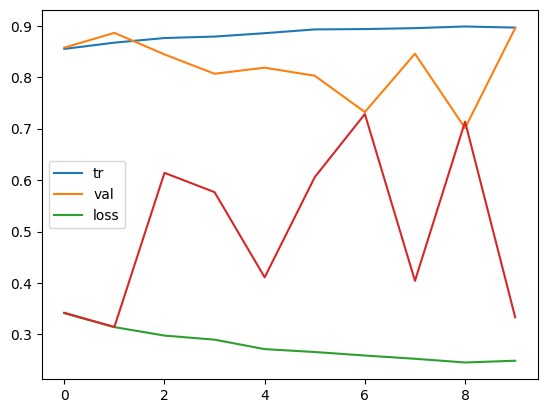

In [ ]:
history.history
plt.plot(history.history['accuracy'],label='tr')
plt.plot(history.history['val_accuracy'],label='val')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

In [ ]:
model.save('my_model.keras')  # ✅ Modern format
tf.saved_model.save(model, 'my_model')  # ✅ Legacy format

In [ ]:
model_load= tf.keras.models.load_model('my_model.keras')

In [ ]:
from PIL import Image  # For image processing
import requests         # To fetch image from URL
from io import BytesIO  # To handle image bytes

# Image URL
img_url = 'https://imgs.search.brave.com/OrVhvzOClFLFH3KP-CaCMXuRUhcE5KlN2yCAG8OvSkk/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9zdGF0/aWMudmVjdGVlenku/Y29tL3N5c3RlbS9y/ZXNvdXJjZXMvdGh1/bWJuYWlscy8wMjQv/NTcwLzczOS9zbWFs/bC9wb3J0cmFpdC1v/Zi1hLWhhcHB5LXdl/bHNoLWNvcmdpLWRv/Zy1pbi1hdXR1bW4t/Zm9yZXN0LWFpLWdl/bmVyYXRlZC1mcmVl/LXBob3RvLmpwZw'

# Load image from URL
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Resize image to match model input
img = img.resize((150, 150))

# Optional: show image
img.show()
img_array = np.array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


predict = model_load.predict(img_array)
predict


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[1.]], dtype=float32)

In [ ]:
TH = 0.5
predict = model.predict(img_array)
print("Raw output:", predict[0][0])

prediction = int(predict[0][0] > TH)
classes = {v: k for k, v in train_generator.class_indices.items()}
print("Predicted class:", classes[prediction])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw output: 1.0
Predicted class: dog


In [ ]:
train_generator.class_indices

{'cat': 0, 'dog': 1}